In [1]:
# Import OS module
import os

# Imports
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
from keras.applications.densenet import preprocess_input


In [2]:
# Connect the Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = "/content/gdrive/MyDrive/masters/train"
path_to_store = "/content"
x = os.listdir(path)
print(x)

['Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Leaf_Mold', 'Tomato___Bacterial_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Early_blight', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Strawberry___Leaf_scorch', 'Potato___Late_blight', 'Soybean___healthy', 'Potato___healthy', 'Squash___Powdery_mildew', 'Raspberry___healthy', 'Potato___Early_blight', 'Strawberry___healthy', 'Grape___healthy', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Corn_(maize)___Northern_Leaf_Blight', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___healthy', 'Peach___Bacterial_spot', 'Corn_(maize)___Common_rust_', 'Peach___healthy', 'Grape___Black_rot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___Cedar_apple_rust', 'Apple___Apple_scab', 'Apple___Black_rot', 'Cherry_(including_sour)

In [4]:
plants = []
NumberOfDiseases = 0
for plant in x:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [5]:
print("The total number of diseases are: " + str(len(x)))

The total number of diseases are: 38


In [6]:
print("Total number of unique plants: "+str(len(plants)))


Total number of unique plants: 14


In [7]:
print("Unique plant Names\n")
for i in plants:
  print(i)

Unique plant Names

Tomato
Pepper,_bell
Strawberry
Potato
Soybean
Squash
Raspberry
Grape
Corn_(maize)
Orange
Peach
Apple
Cherry_(including_sour)
Blueberry


In [8]:
length = []
for i in x:
  leng = len(os.listdir(path+"/"+i))
  print(i)
  print(leng)
  length.append(leng)

Tomato___healthy
2086
Tomato___Late_blight
2011
Tomato___Target_Spot
1987
Tomato___Septoria_leaf_spot
1905
Tomato___Tomato_mosaic_virus
1964
Tomato___Tomato_Yellow_Leaf_Curl_Virus
2131
Tomato___Leaf_Mold
2042
Tomato___Bacterial_spot
1862
Tomato___Spider_mites Two-spotted_spider_mite
1901
Tomato___Early_blight
2080
Pepper,_bell___Bacterial_spot
2073
Pepper,_bell___healthy
2148
Strawberry___Leaf_scorch
1934
Potato___Late_blight
2099
Soybean___healthy
2182
Potato___healthy
1984
Squash___Powdery_mildew
1898
Raspberry___healthy
1941
Potato___Early_blight
2099
Strawberry___healthy
1984
Grape___healthy
1852
Grape___Esca_(Black_Measles)
2080
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
1882
Corn_(maize)___Northern_Leaf_Blight
2078
Orange___Haunglongbing_(Citrus_greening)
2170
Corn_(maize)___healthy
2019
Peach___Bacterial_spot
1998
Corn_(maize)___Common_rust_
2067
Peach___healthy
1888
Grape___Black_rot
2058
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
1802
Apple___Cedar_apple_rust
1760
Appl

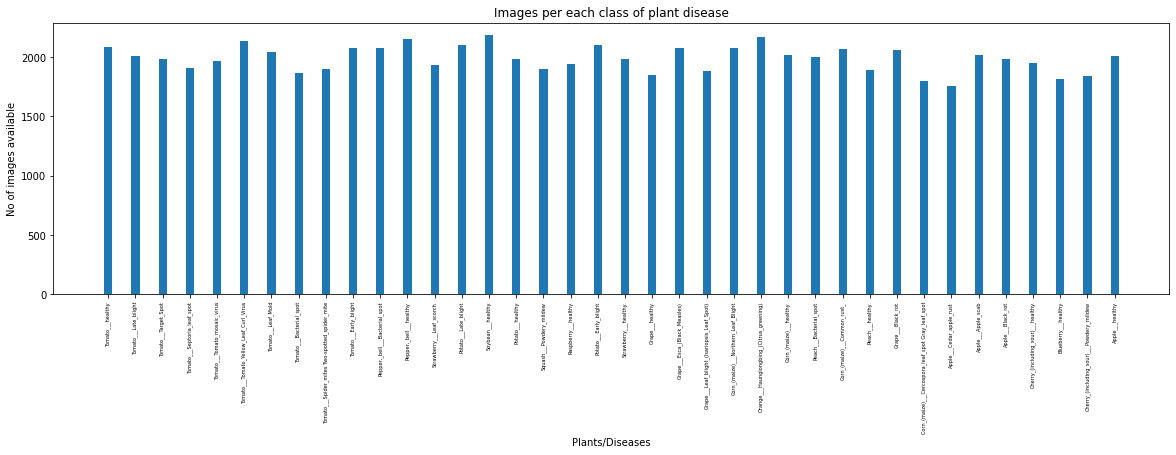

In [9]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in length], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, x, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')
plt.savefig("/content/gdrive/MyDrive/masters/plotting images/Images_per_class.png")

In [10]:
# Configure variables for Transfer learning
imageSize = 224
inputShape = (224, 224, 3)
gridShape = (1, 224, 224, 3)

batchSize = 32

#Loading images from directory


In [11]:
dataset_root = "/content/gdrive/MyDrive/masters"

train_dir = os.path.join(dataset_root, "train")
test_dir = os.path.join(dataset_root, "test")
val_dir = os.path.join(dataset_root, "valid")

In [12]:

import keras
from keras import callbacks, layers, Model
from keras.preprocessing.image import ImageDataGenerator

# Define diffrent augmnetation on image for train dataset and read the images
train_aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=45, rescale=1/255.0, fill_mode="nearest",
     width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2,shear_range=0.2)


# Reading data from the disk
train_data = train_aug.flow_from_directory(
    train_dir, target_size=(imageSize, imageSize), batch_size=batchSize, class_mode="categorical"
)

Found 75584 images belonging to 38 classes.


In [ ]:
# Augmentations for test data
test_aug = ImageDataGenerator(
    # Rescale
    rescale=1/255.0
)

# Read data from directory
test_data = test_aug.flow_from_directory(
    test_dir,
    target_size=(imageSize, imageSize),
    batch_size=batchSize,
    class_mode="categorical"
)

Found 656 images belonging to 38 classes.


In [ ]:
from google.colab import files
files.upload()


Saving valid.zip to valid.zip


In [ ]:
!unzip "/content/valid.zip" -d "/content/valid/"

In [ ]:
# Augmentations for test data
valid_aug = ImageDataGenerator(
    # Rescale
    rescale=1/255.0
)

# Read data from directory
valid_data = valid_aug.flow_from_directory(
    "/content/valid/valid/",
    target_size=(imageSize, imageSize),
    batch_size=batchSize,
    class_mode="categorical"
)

### Get the list of categories in training data

In [ ]:

cat_num = 0
cats = list(train_data.class_indices.keys())
for  i in cats:
  print(str(cat_num) + " - " + i)
  cat_num = cat_num+1

In [ ]:

Plant_disease_dict = dict(zip(train_data.class_indices.values(), train_data.class_indices.keys()))

In [ ]:
print(Plant_disease_dict)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

### Get shape and size of image

In [ ]:
train_image, lable = train_data.next()
train_image.shape

(32, 224, 224, 3)

### Display Images

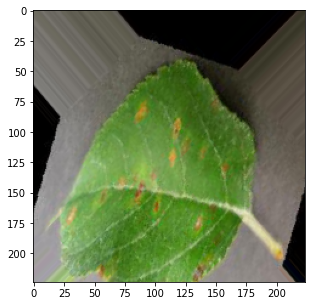

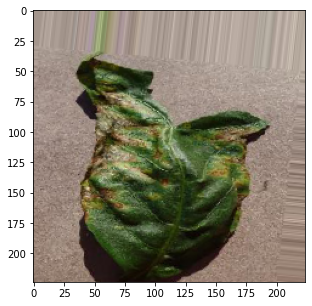

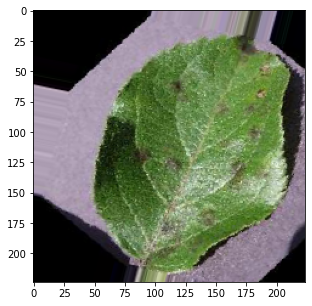

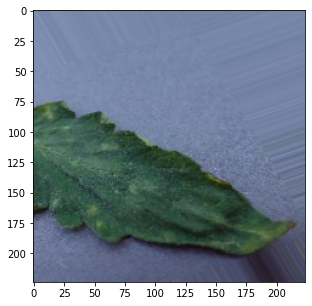

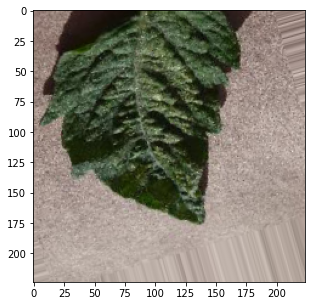

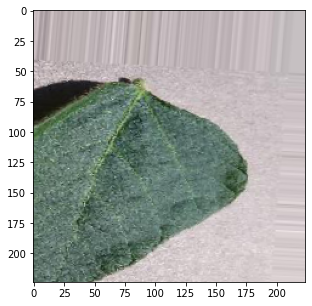

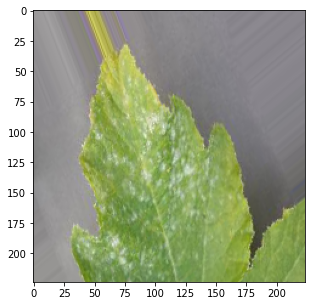

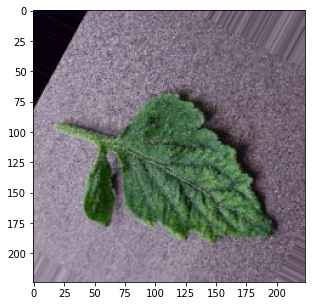

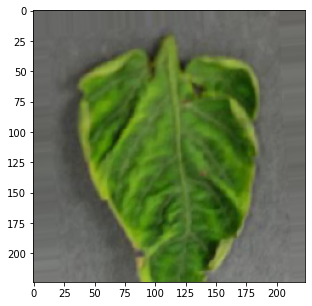

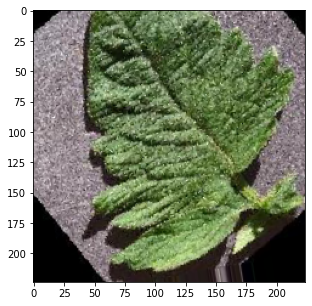

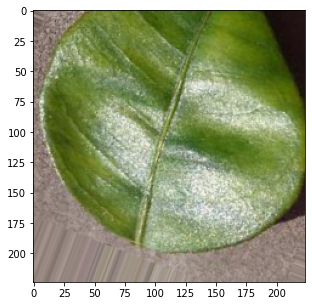

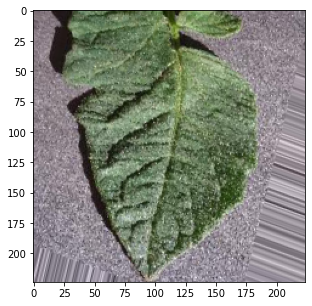

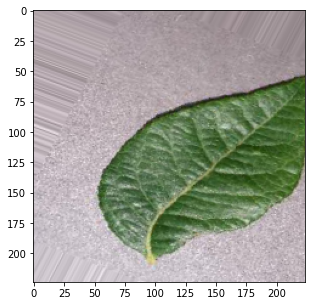

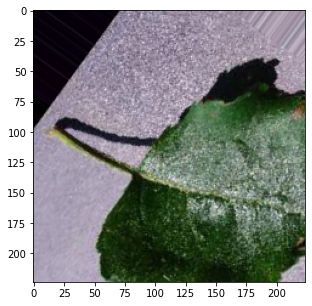

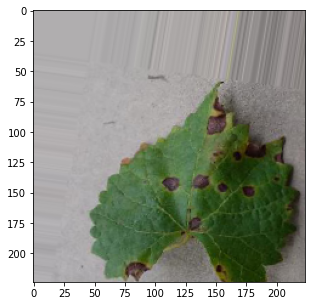

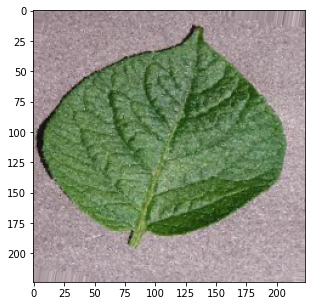

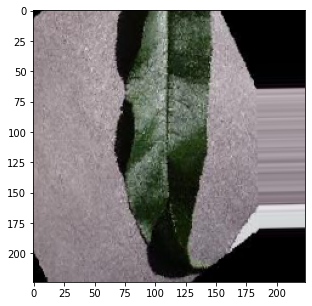

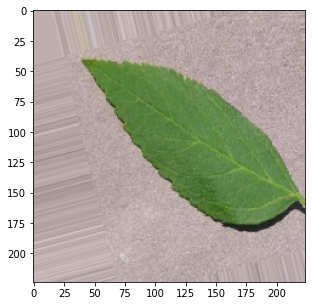

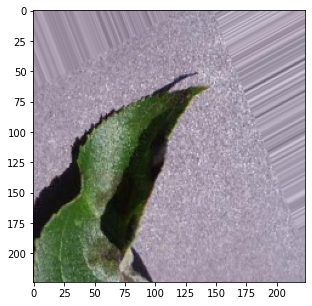

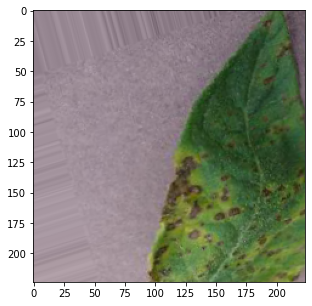

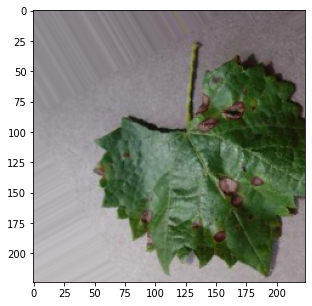

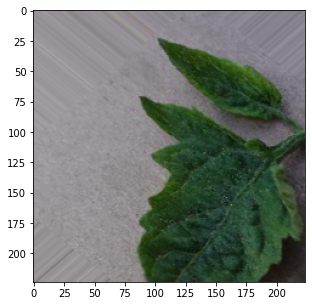

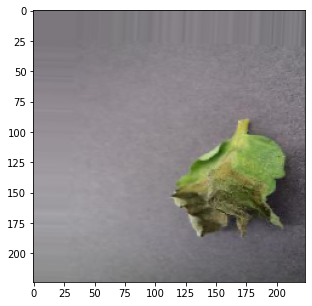

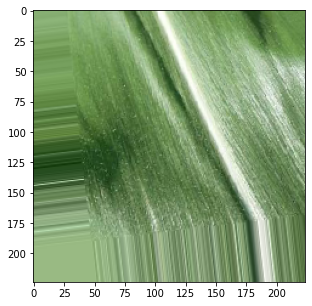

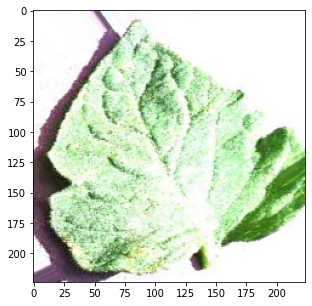

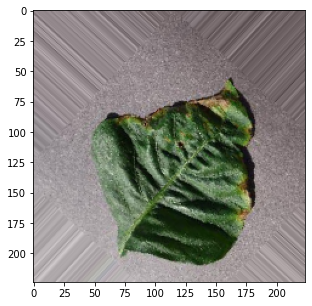

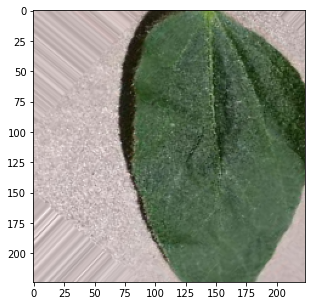

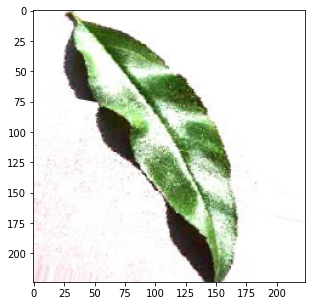

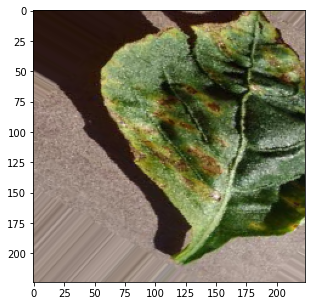

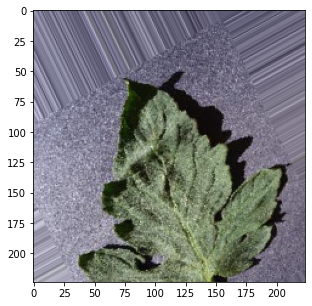

In [ ]:
def plotingImage(image , lable):
  for img , lbl in zip(image, lable):
    img = img.astype(np.float64)
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.show()
plotingImage(train_image[:30] , lable[:30])

In [ ]:
# Load the base model
import keras
from keras.applications.mobilenet_v2 import MobileNetV2

mbnet_v2 = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=inputShape
)


# Stop from being trainable
mbnet_v2.trainable = False

print(mbnet_v2.output)

9420800/9406464 [==============================] - 0s 0us/step
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 1280), dtype=tf.float32, name=None), name='out_relu/Relu6:0', description="created by layer 'out_relu'")


In [ ]:
# Define the layers
inputs = keras.Input(shape=inputShape)

# Get the layer
x = mbnet_v2(inputs, training = False)

# Stack layers further
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(cats), activation="softmax")(x)

# Combine the model
model = Model(inputs=inputs, outputs=x)

# Summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 38)                48678     
                                                                 
Total params: 2,306,662
Trainable params: 48,678
Non-trainabl

In [ ]:
import math

def step_decay(epoch):
	initial_lrate = 0.001
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate
 

In [ ]:
# # Compile
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

lr_sched = LearningRateScheduler(step_decay)


#early checkpoint
es = EarlyStopping(monitor = 'accuracy',  patience= 5, verbose=1)

#model checkpoint
mc = ModelCheckpoint(filepath='best_model.h5', monitor = 'accuracy', patience= 5, verbose=1, save_best_only=True)

cb = [es,mc, lr_sched]

In [ ]:
# Num epochs
epochs = 100

model.compile(optimizer= 'Adam' , loss = 'mse', metrics=['accuracy'])

# Train model
history = model.fit(train_data, epochs=epochs,
                    steps_per_epoch=len(train_data)/batchSize, validation_data= valid_data,
                     callbacks=cb, verbose=1)

Epoch 1/100
74/73 [==============================] - ETA: -1s - loss: 0.0232 - accuracy: 0.2323
Epoch 1: accuracy improved from -inf to 0.23226, saving model to best_model.h5
73/73 [==============================] - 685s 9s/step - loss: 0.0232 - accuracy: 0.2323 - val_loss: 0.0184 - val_accuracy: 0.4786 - lr: 0.0010
Epoch 2/100
74/73 [==============================] - ETA: -1s - loss: 0.0158 - accuracy: 0.5431
Epoch 2: accuracy improved from 0.23226 to 0.54307, saving model to best_model.h5
73/73 [==============================] - 651s 9s/step - loss: 0.0158 - accuracy: 0.5431 - val_loss: 0.0128 - val_accuracy: 0.6530 - lr: 0.0010
Epoch 3/100
74/73 [==============================] - ETA: -1s - loss: 0.0120 - accuracy: 0.6841
Epoch 3: accuracy improved from 0.54307 to 0.68412, saving model to best_model.h5
73/73 [==============================] - 653s 9s/step - loss: 0.0120 - accuracy: 0.6841 - val_loss: 0.0103 - val_accuracy: 0.7342 - lr: 0.0010
Epoch 4/100
74/73 [=====================

## Evaluating and predicting 

In [ ]:
loss, accuracy = model.evaluate(test_data)
print("model accuracy is : {:5.2f}%".format(100 * accuracy))

21/21 [==============================] - 178s 9s/step - loss: 0.0054 - accuracy: 0.8506
model accuracy is : 85.06%


In [ ]:
import smtplib

server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login("rpbhandwalkar@gmail.com", "ctguzzqkahwtzhem")

msg = "your model was trained sucessfully, model accuracy is : "
server.sendmail("rpbhandwalkar@gmail.com", "rpbhandwalkar@gmail.com", msg)
server.quit()

In [ ]:
model.evaluate(valid_data)

In [ ]:

def predection(path):
  img = load_img(path, target_size= inputShape)
  i = img_to_array(img)
  im = preprocess_input(i)
  im = np.expand_dims(i, axis=0)
  pred = np.argmax(model.predict(im))

  print(cats[pred].replace("_", " "))

In [ ]:
predection("/content/gdrive/MyDrive/masters/test/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/63762409-379e-4299-a46a-5f6db703687e___RS_GLSp 4333_new30degFlipLR.JPG")

Corn (maize)   Cercospora leaf spot Gray leaf spot


In [ ]:
hist = history.history
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

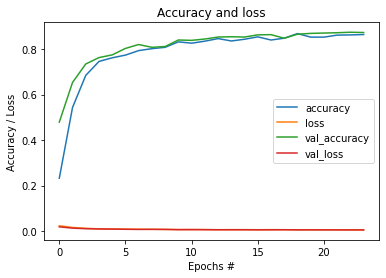

In [ ]:


# Plot accuracy and loss
plt.title("Accuracy and loss")
plt.plot(hist["accuracy"], label="accuracy")
plt.plot(hist["loss"], label="loss")

if "val_accuracy" in hist and "val_loss" in hist:
    plt.plot(hist["val_accuracy"], label="val_accuracy")
    plt.plot(hist["val_loss"], label="val_loss")

# Add the labels and legend
plt.ylabel("Accuracy / Loss")
plt.xlabel("Epochs #")
plt.legend()

plt.savefig('/content/gdrive/MyDrive/masters/plotting images/acc_loss.png', bbox_inches='tight')

# Finally show the plot
plt.show()

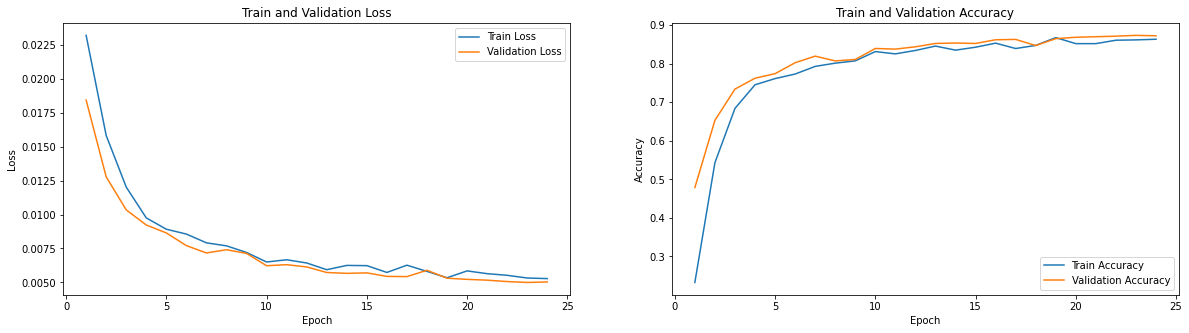

In [ ]:

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(1,len(hist['loss'])+1),hist['loss'],label="Train Loss")
plt.plot(range(1,len(hist['val_loss'])+1),hist['val_loss'], label="Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(range(1,len(hist['accuracy'])+1),hist['accuracy'], label="Train Accuracy")
plt.plot(range(1,len(hist['val_accuracy'])+1),hist['val_accuracy'], label="Validation Accuracy")
plt.legend()

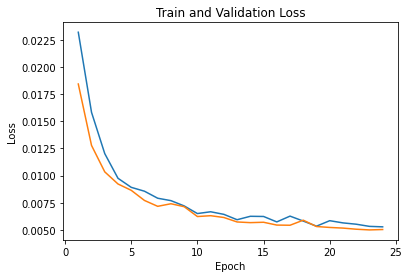

In [ ]:

plt.plot
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(1,len(hist['loss'])+1),hist['loss'],label="Train Loss")
plt.plot(range(1,len(hist['val_loss'])+1),hist['val_loss'], label="Validation Loss")

plt.savefig('/content/gdrive/MyDrive/masters/plotting images/Train_and_Validation_Loss.png', bbox_inches='tight')




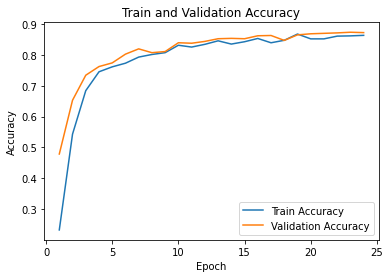

In [ ]:
plt.plot
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(range(1,len(hist['accuracy'])+1),hist['accuracy'], label="Train Accuracy")
plt.plot(range(1,len(hist['val_accuracy'])+1),hist['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.savefig('/content/gdrive/MyDrive/masters/plotting images/Train_and_Validation_Accuracy.png', bbox_inches='tight')



In [ ]:
# serialize the model to disk
print("saving leaf detector model...")
model.save("/content/gdrive/MyDrive/masters/saved_model/Model h5/leaf_detector.model", save_format="h5")



saving leaf detector model...


In [ ]:
# Initialize data to lists.
data = [{'PlantName': 'Apple', 'LeafDisease':'Apple scab'},
        {'PlantName': 'Apple', 'LeafDisease':'Black rot'},
        {'PlantName': 'Apple', 'LeafDisease':'Cedar apple rust'},
        {'PlantName': 'Apple', 'LeafDisease':'Healty'},
        {'PlantName': 'Blueberry', 'LeafDisease':'Healty'},
        {'PlantName': 'Cherry_(including_sour)', 'LeafDisease':'Powdery mildew'},
        {'PlantName': 'Cherry_(including_sour)', 'LeafDisease':'healthy'},
        {'PlantName': 'Corn_(maize)', 'LeafDisease':'healthy'},
        {'PlantName': 'Corn_(maize)', 'LeafDisease':'Cercospora leaf spot Gray leaf spot'},
        {'PlantName': 'Corn_(maize)', 'LeafDisease':'Common rust'},
        {'PlantName': 'Corn_(maize)', 'LeafDisease':'Northern Leaf Blight'},
        {'PlantName': 'Grape', 'LeafDisease':'healthy'},
        {'PlantName': 'Grape', 'LeafDisease':'Black rot'},
        {'PlantName': 'Grape', 'LeafDisease':'Esca_(Black Measles)'},
        {'PlantName': 'Grape', 'LeafDisease':'Leaf blight(Isariopsis Leaf Spot)'},
        {'PlantName': 'Orange', 'LeafDisease':'Haunglongbing(Citrus greening)'},
        {'PlantName': 'Peach', 'LeafDisease':'Bacterial_spot'},
        {'PlantName': 'Peach', 'LeafDisease':'healthy'},
        {'PlantName': 'Pepper, bell', 'LeafDisease':'Bacterial_spot'},
        {'PlantName': 'Pepper, bell', 'LeafDisease':'healthy'},
        {'PlantName': 'Potato', 'LeafDisease':'healthy'},
        {'PlantName': 'Potato', 'LeafDisease':'Early blight'},
        {'PlantName': 'Potato', 'LeafDisease':'Late blight'},
        {'PlantName': 'Raspberry', 'LeafDisease':'healthy'},
        {'PlantName': 'Soybean', 'LeafDisease':'healthy'},
        {'PlantName': 'Squash', 'LeafDisease':'Powdery mildew'},
        {'PlantName': 'Strawberry', 'LeafDisease':'healthy'},
        {'PlantName': 'Strawberry', 'LeafDisease':'Leaf scorch'},
        {'PlantName': 'Tomato', 'LeafDisease':'healthy'},
        {'PlantName': 'Tomato', 'LeafDisease':'Bacterial spot'},
        {'PlantName': 'Tomato', 'LeafDisease':'Early blight'},
        {'PlantName': 'Tomato', 'LeafDisease':'Late blight'},
        {'PlantName': 'Tomato', 'LeafDisease':'Leaf Mold'},
        {'PlantName': 'Tomato', 'LeafDisease':'Septoria leaf spot'},
        {'PlantName': 'Tomato', 'LeafDisease':'Spider mites, Two-spotted spider mite'},
        {'PlantName': 'Tomato', 'LeafDisease':'Target Spot'},
        {'PlantName': 'Tomato', 'LeafDisease':'Tomato Yellow Leaf Curl Virus'},
        {'PlantName': 'Tomato', 'LeafDisease':'Tomato mosaic virus'},
        {'PlantName': 'Cotton', 'LeafDisease':'cotton bacterial blight'},
        {'PlantName': 'Cotton', 'LeafDisease':'cotton curl virus'},
        {'PlantName': 'Cotton', 'LeafDisease':'cotton fussarium wilt'},
        {'PlantName': 'Cotton', 'LeafDisease':'cotton healthy'},
        {'PlantName': 'Rice', 'LeafDisease':'Rice Bacterial leaf blight'},
        {'PlantName': 'Rice', 'LeafDisease':'Rice Brown_spot'},
        {'PlantName': 'Rice', 'LeafDisease':'Rice Leaf smut'},
        
        ]



        # Creates DataFrame.
df = pd.DataFrame(data)
 
# Print the data
df

In [ ]:
from tensorflow import lite
converter = lite. TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
print("saving tflite model...")
open('/content/gdrive/MyDrive/masters/saved_model/Tensorflow model/leafpred.tflite', 'wb').write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmp6o_47jt2/assets


saving tflite model...


9061340

In [ ]:
from google.colab import files
files.download('leafpred.tflite')

In [ ]:
filepath ="/content/gdrive/MyDrive/masters/saved_model/Model h5/leaf_detector.model" 


model = tf.keras.models.load_model(filepath)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 38)                48678     
                                                                 
Total params: 2,306,662
Trainable params: 48,678
Non-trainabl